In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                     9KB  2022-10-06 08:55:25           7075        229  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset              11KB  2022-09-30 04:05:11           5674        184  1.0              
akshaydattatraykhare/car-details-dataset                        Car Details Dataset                                 56KB  2022-10-21 06:11:56           1436         32  1.0              
whena

In [ ]:
!unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/trainML/6/2086.1.png  
  inflating: dataset/trainML/6/2088.1.png  
  inflating: dataset/trainML/6/2093.2.png  
  inflating: dataset/trainML/6/210.1.png  
  inflating: dataset/trainML/6/2113.1.png  
  inflating: dataset/trainML/6/2120.1.png  
  inflating: dataset/trainML/6/2126.0.png  
  inflating: dataset/trainML/6/2127.1.png  
  inflating: dataset/trainML/6/2133.2.png  
  inflating: dataset/trainML/6/2148.1.png  
  inflating: dataset/trainML/6/2154.0.png  
  inflating: dataset/trainML/6/2159.0.png  
  inflating: dataset/trainML/6/2173.1.png  
  inflating: dataset/trainML/6/2179.1.png  
  inflating: dataset/trainML/6/2187.2.png  
  inflating: dataset/trainML/6/2193.0.png  
  inflating: dataset/trainML/6/2195.0.png  
  inflating: dataset/trainML/6/2198.0.png  
  inflating: dataset/trainML/6/2202.2.png  
  inflating: dataset/trainML/6/2205.1.png  
  inflating: dataset/trainML/6/2211.1.png  
  inflating: dataset/train

In [ ]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt

import os

In [ ]:
width = 100
num_classes = 10
trainpath = '/content/dataset/trainML/'
testpath = '/content/dataset/valML/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = os.path.join(imagePath, item)
          c+=1
          l = imagePath.split('/')[4]           
          if l == '0':
            labels.append([1,0,0,0,0,0,0,0,0,0])         
          elif l == '1':
            labels.append([0,1,0,0,0,0,0,0,0,0])
          elif l == '2':
            labels.append([0,0,1,0,0,0,0,0,0,0])
          elif l == '3':
            labels.append([0,0,0,1,0,0,0,0,0,0])
          elif l == '4':
            labels.append([0,0,0,0,1,0,0,0,0,0]) 
          elif l == '5':
            labels.append([0,0,0,0,0,1,0,0,0,0])
          elif l == '6':
            labels.append([0,0,0,0,0,0,1,0,0,0])
          elif l == '7':
            labels.append([0,0,0,0,0,0,0,1,0,0])
          elif l == '8':
            labels.append([0,0,0,0,0,0,0,0,1,0])
          elif l == '9':
            labels.append([0,0,0,0,0,0,0,0,0,1])  
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rawImgs.append(img)

  return rawImgs, labels

In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 200/200 [00:00<00:00, 8367.35it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((8000, 100, 100, 3), (8000, 10), (2000, 100, 100, 3), (2000, 10))

In [ ]:
model0 = Sequential([
        Conv2D(100, (3,3), activation='relu', input_shape=(width, width, 3)),
        Conv2D(100, (3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(100,(3,3) , activation='relu'),
        Conv2D(100,(3,3) , activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])

In [ ]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 100)       90100     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 100)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 100)       90100     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 100)      0         
 2D)                                                    

In [ ]:
model0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 512
epochs = 20

In [ ]:
history = model0.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
16/16 [==============================] - 62s 3s/step - loss: 2.3672 - accuracy: 0.1035 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 2/20
16/16 [==============================] - 24s 1s/step - loss: 2.3019 - accuracy: 0.1024 - val_loss: 2.2961 - val_accuracy: 0.1850
Epoch 3/20
16/16 [==============================] - 23s 1s/step - loss: 2.2693 - accuracy: 0.1727 - val_loss: 2.2357 - val_accuracy: 0.2145
Epoch 4/20
16/16 [==============================] - 23s 1s/step - loss: 2.0744 - accuracy: 0.3074 - val_loss: 1.9626 - val_accuracy: 0.3510
Epoch 5/20
16/16 [==============================] - 23s 1s/step - loss: 1.6869 - accuracy: 0.4658 - val_loss: 1.5831 - val_accuracy: 0.5055
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 1.4067 - accuracy: 0.5638 - val_loss: 1.4695 - val_accuracy: 0.5405
Epoch 7/20
16/16 [==============================] - 23s 1s/step - loss: 1.2182 - accuracy: 0.6221 - val_loss: 1.3417 - val_accuracy: 0.5975
Epoch 8/20
16/16 [==

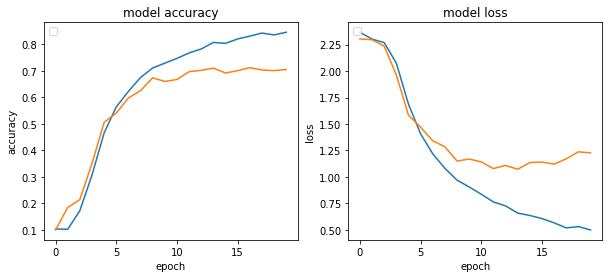

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])

In [ ]:
score = model0.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.22777259349823
Test accuracy: 0.7045000195503235


In [ ]:
model0.save("model.h5")